In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tesspoint import TESSPoint, footprint

In [3]:
# test 1 point
test_ra = 314.1268529308317 
test_dec = -47.822908672402036 

In [4]:
%run -p -i tess_stars2px_debug.py -t 0 -s 1 -c 314.1268529308317 -47.822908672402036 

# TIC     |   RA      |   Dec     | EclipticLong | EclipticLat | Sector | Camera | Ccd | ColPix | RowPix | EdgeWarn
DEBUG: optics_fp: cphi: -0.7073508258875031
DEBUG: optics_fp: sphi: -0.7068626522290361
DEBUG: optics_fp: rfp0*rfp: 44.62618284419898
DEBUG: optics_fp: xytmp: [31.56636729 31.54458196]
DEBUG: optics_fp: xytmp shape: (2,)
radec2pix: curVec: [ 0.46747872 -0.48194843 -0.74107311] i: 0
radec2pix: camVec: [-0.20209188 -0.20195241  0.95831837] i: 0 j:0
radec2pix: lng: 224.9802220176646
radec2pix: lat: 73.39915628169348
radec2pix: xyfp: [31.56636729 31.54458196]
radec2pix: fitsxpos: [4227.03017677]
radec2pix: fitsypos: [4155.02950708]
radec2pix: ccdxpos: [-0.03017677]
radec2pix: ccdypos: [-0.02950708]
DEBUG: optics_fp: cphi: -0.7059081270278734
DEBUG: optics_fp: sphi: 0.7083034068787187
DEBUG: optics_fp: rfp0*rfp: 45.16507518038426
DEBUG: optics_fp: xytmp: [ 31.88239363 -31.99057662]
DEBUG: optics_fp: xytmp shape: (2,)
radec2pix: curVec: [ 0.46747872 -0.48194843 -0.74107311] i: 

In [36]:
tp = TESSPoint(1, 1, 1)
target=np.array([[314.1268529308317, -47.822908672402036]])
print(target.shape)
print(tp.radec2pix(target))

DEBUG:root:radec2pix: curVec: [[ 0.46747872 -0.48194843 -0.74107311]]
DEBUG:root:radec2pix: curVec Shape: (1, 3)
DEBUG:root:radec2pix: camVec: [[-0.20209188]
 [-0.20195241]
 [ 0.95831837]]
DEBUG:root:radec2pix: camVec Shape: (3, 1)
DEBUG:root:cartToSphere: vec: [[-0.20209188 -0.20195241  0.95831837]]
DEBUG:root:radec2pix: lng: [224.98022202]
DEBUG:root:radec2pix: lat: [73.39915628]
DEBUG:root:optics_fp: rtanth: [44.62618284]
DEBUG:root:optics_fp: cphi: [-0.70735083]
DEBUG:root:optics_fp: sphi: [-0.70686265]
DEBUG:root:optics_fp: xyfp: [[31.56636729 31.54458196]]
DEBUG:root:optics_fp: xyfp shape: (1, 2)
DEBUG:root:make_az_asym: xyp: [[31.56636729 31.54458196]]
DEBUG:root:make_az_asym: xyp: shape:  (1, 2)
DEBUG:root:radec2pix: xyfp: [[31.56636729 31.54458196]]
DEBUG:root:radec2pix: xyfp Shape: (1, 2)
DEBUG:root:mm_to_pix: fitpx: [[0. 0.]]
DEBUG:root:mm_to_pix: fitpx.shape: (1, 2)
DEBUG:root:radec2pix: xyfp: [[31.56636729 31.54458196]]
DEBUG:root:radec2pix: ccdpx: [[-0.03017677 -0.0295070

(1, 2)
(array([[44.96982323,  0.97049292]]), array([ True]))


# Now Test ra,dec footprint to pixel footprint

In [6]:
import pandas as pd

In [7]:
%run -p -i ../../tess-point/tess_stars2px.py -f inp_radec.dat -o out_radec.dat

In [8]:
pixfootie_old=pd.read_table("out_radec.dat",sep='|',skiprows=16,names=['tic','ra','dec','elo','ela','sector','camera','detector','pixel_c','pixel_r','edge'])
#cut = pixfootie_old.sector == 1 & pixfootie_old.camera == 1 & pixfootie_old.detector == 1
pixfootie_old=pixfootie_old.query("sector == 1 and camera == 1 and detector == 1")

In [9]:
pixfootie_old

,tic,ra,dec,elo,ela,sector,camera,detector,pixel_c,pixel_r,edge
0,0,314.126853,-47.822909,302.384439,-29.223220,1,1,1,44.969823,0.970493,1
3,1,314.035769,-47.612711,302.394116,-29.004435,1,1,1,44.862740,42.689451,1
6,2,313.946084,-47.400915,302.404792,-28.784344,1,1,1,44.885667,84.536391,1
9,3,313.857874,-47.187502,302.416532,-28.562942,1,1,1,45.049964,126.514245,1
12,4,313.768257,-46.975409,302.426173,-28.342408,1,1,1,44.843803,168.143463,1
...,...,...,...,...,...,...,...,...,...,...,...
510,184,325.811631,-37.038892,315.396387,-21.977011,1,1,1,2092.042409,1423.358939,1
513,185,325.703364,-36.810860,315.396229,-21.733105,1,1,1,2092.010222,1465.111682,1
516,186,325.595259,-36.581395,315.396188,-21.487814,1,1,1,2091.996056,1507.060633,1
519,187,325.488427,-36.353802,315.395916,-21.244547,1,1,1,2091.944803,1548.625715,1


In [10]:
footie=footprint()
footprint_radec = tp.pix2radec(footie)
print(footie.shape)
f2=np.array([footprint_radec[0],footprint_radec[1]]).T 
# so right now we're outputting (footpring_radec) a tuple not an array
print(f2.shape) 
footprint_pix = tp.radec2pix(f2)

DEBUG:root:DEBUG: cartToSphere: vec: [[ 0.46747872 -0.48194843 -0.74107311]
 [ 0.46859863 -0.48464224 -0.73860492]
 [ 0.46973101 -0.4873376  -0.7361079 ]
 [ 0.47087665 -0.49003384 -0.73358164]
 [ 0.47198482 -0.49272736 -0.73106093]
 [ 0.47310768 -0.49542149 -0.7285099 ]
 [ 0.47424612 -0.49811539 -0.72592815]
 [ 0.47534913 -0.50080727 -0.72335005]
 [ 0.47646933 -0.50349838 -0.72074015]
 [ 0.4776077  -0.50618772 -0.7180981 ]
 [ 0.47871293 -0.50887536 -0.71545776]
 [ 0.47983812 -0.51156036 -0.71278424]
 [ 0.48093177 -0.5142441  -0.710111  ]
 [ 0.48204731 -0.51692412 -0.7074036 ]
 [ 0.48318583 -0.51959904 -0.70466183]
 [ 0.48424265 -0.52227704 -0.70195138]
 [ 0.48537733 -0.52494439 -0.69917253]
 [ 0.48648513 -0.52760987 -0.69639073]
 [ 0.48756692 -0.53027409 -0.69360499]
 [ 0.48867695 -0.5329297  -0.69078272]
 [ 0.48976303 -0.53558354 -0.68795526]
 [ 0.49082613 -0.53823604 -0.68512165]
 [ 0.49192082 -0.54087726 -0.68225046]
 [ 0.49299471 -0.5435162  -0.67937203]
 [ 0.4940488  -0.54615312 -

DEBUG:root:DEBUG: radec2pix: curVec Shape: (200, 3)
DEBUG:root:DEBUG: radec2pix: camVec: [[-0.20209188 -0.2023706  -0.20263339 -0.20287911 -0.2031508  -0.20340395
  -0.20363726 -0.20389505 -0.20413122 -0.20434433 -0.20457995 -0.2047904
  -0.20502212 -0.20522634 -0.20540132 -0.20564434 -0.20580641 -0.20598518
  -0.20618016 -0.20633931 -0.20651253 -0.20669916 -0.20684556 -0.20700293
  -0.20717044 -0.2072929  -0.2074228  -0.20755919 -0.20770107 -0.20784739
  -0.20794061 -0.20803531 -0.20818767 -0.20828241 -0.20837531 -0.20846526
  -0.20855116 -0.20863193 -0.20870649 -0.20877384 -0.20883299 -0.20888301
  -0.20892303 -0.20895227 -0.20897    -0.20903636 -0.2090294  -0.20907028
  -0.20909783 -0.20911176 -0.20209188 -0.19835247 -0.19458674 -0.19079457
  -0.1870166  -0.18321116 -0.17937825 -0.17551787 -0.17166889 -0.1678299
  -0.16392398 -0.16002733 -0.15613855 -0.15222018 -0.148308   -0.14436583
  -0.14039419 -0.13642716 -0.13246342 -0.1284696  -0.12447791 -0.12048711
  -0.11646619 -0.11244535

DEBUG:root:DEBUG: radec2pix: lng: [224.98022202 224.40496423 223.81817388 223.2196275  222.60910286
 221.98637962 221.3512401  220.70347004 220.0428595  219.3692038
 218.68230452 217.9819706  217.26801949 216.54027839 215.79858556
 215.04279171 214.27276144 213.48837478 212.68952877 211.87613912
 211.04814185 210.20549511 209.34818088 208.47620675 207.58960777
 206.68844816 205.77282307 204.84286027 203.89872178 202.94060536
 201.96874592 200.98341677 199.9849307  198.97364085 197.94994135
 196.91426772 195.86709702 194.80894764 193.7403788  192.66198978
 191.5744187  190.47834104 189.37446774 188.26354304 187.14634186
 186.02366699 184.89634589 183.76522723 182.63117726 181.49507587
 224.98022202 225.5547062  226.1407239  226.73849963 227.34825671
 227.97021668 228.60459851 229.25161783 229.91148603 230.58440935
 231.27058788 231.97021444 232.68347343 233.41053961 234.1515768
 234.90673644 235.6761562  236.45995841 237.2582485  238.0711133
 238.89861942 239.74081142 240.5977101  241.4

DEBUG:root:DEBUG: optics_fp: sphi: [-0.70686265 -0.69972524 -0.69237208 -0.68479678 -0.67699291 -0.66895393
 -0.66067327 -0.65214432 -0.64336046 -0.63431508 -0.62500159 -0.61541348
 -0.6055443  -0.59538774 -0.58493765 -0.57418807 -0.56313326 -0.55176778
 -0.54008652 -0.52808473 -0.51575811 -0.50310284 -0.49011561 -0.47679377
 -0.46313529 -0.44913887 -0.434804   -0.42013103 -0.40512119 -0.38977669
 -0.37410077 -0.35809773 -0.34177298 -0.32513313 -0.30818595 -0.29094045
 -0.27340688 -0.25559674 -0.23752278 -0.21919898 -0.20064054 -0.18186382
 -0.16288631 -0.14372654 -0.12440405 -0.10493926 -0.08535338 -0.06566832
 -0.04590657 -0.02609104 -0.70686265 -0.71391935 -0.72104378 -0.72823343
 -0.73548551 -0.7427969  -0.75016414 -0.75758342 -0.76505051 -0.77256083
 -0.78010934 -0.78769059 -0.79529865 -0.80292714 -0.81056916 -0.81821732
 -0.82586371 -0.83349989 -0.84111688 -0.84870516 -0.85625464 -0.8637547
 -0.87119419 -0.87856141 -0.88584414 -0.89302968 -0.90010486 -0.90705607
 -0.9138693  -0.9

DEBUG:root:DEBUG: make_az_asym: xyp: shape:  (200, 2)
DEBUG:root:DEBUG: radec2pix: xyfp: [[31.56636729 31.54458196]
 [31.56776419 30.9187971 ]
 [31.56721031 30.29109313]
 [31.56453521 29.66142619]
 [31.56741874 29.03698691]
 [31.56791843 28.41029602]
 [31.56584147 27.78132587]
 [31.56900146 27.15695161]
 [31.56928067 26.5300392 ]
 [31.56646237 25.9005825 ]
 [31.56849897 25.27513314]
 [31.56708916 24.64692032]
 [31.57028107 24.02227335]
 [31.56964763 23.39467314]
 [31.564931   22.76416169]
 [31.57278634 22.14266294]
 [31.56772903 21.51206102]
 [31.56645701 20.88417268]
 [31.56885435 20.25869794]
 [31.56610563 19.62993612]
 [31.56665772 19.00327894]
 [31.57037424 18.37845031]
 [31.56824511 17.75019547]
 [31.56887206 17.12352849]
 [31.57209946 16.49820382]
 [31.56872769 15.86944191]
 [31.5675151  15.24186478]
 [31.56829045 14.61526453]
 [31.57087786 13.98944474]
 [31.57509721 13.36422123]
 [31.57145741 12.73566814]
 [31.56897816 12.10771307]
 [31.57688159 11.48364069]
 [31.57621672 10.856

DEBUG:root:DEBUG: radec2pix: ccdpx: [[-3.01767698e-02 -2.95070789e-02]
 [-1.37259763e-01  4.16894506e+01]
 [-1.14333342e-01  8.35363915e+01]
 [ 4.99639503e-02  1.25514245e+02]
 [-1.56197125e-01  1.67143463e+02]
 [-2.03486368e-01  2.08922843e+02]
 [-7.90496058e-02  2.50854230e+02]
 [-3.03640064e-01  2.92479108e+02]
 [-3.36235294e-01  3.34273260e+02]
 [-1.62387022e-01  3.76237101e+02]
 [-3.12108884e-01  4.17933677e+02]
 [-2.32132063e-01  4.59814560e+02]
 [-4.58856185e-01  5.01457618e+02]
 [-4.30623525e-01  5.43297644e+02]
 [-1.30243575e-01  5.85331844e+02]
 [-6.67793214e-01  6.26764916e+02]
 [-3.44702629e-01  6.68805155e+02]
 [-2.73904423e-01  7.10664404e+02]
 [-4.47676543e-01  7.52362664e+02]
 [-2.78450643e-01  7.94280177e+02]
 [-3.29232655e-01  8.36057308e+02]
 [-5.90935408e-01  8.77712465e+02]
 [-4.63004471e-01  9.19596166e+02]
 [-5.18776918e-01  9.61373948e+02]
 [-7.47882585e-01  1.00306219e+03]
 [-5.37120748e-01  1.04497972e+03]
 [-4.70277393e-01  1.08681822e+03]
 [-5.35942202e-01  

DEBUG:root:DEBUG: fitpix2pix: ccdpx: shape: (200, 2)
DEBUG:root:DEBUG: fitpix2pix: visCut: True


(200, 2)
(200, 2)


In [12]:
fp_comp=footprint_pix[0]
fp_comp=fp_comp[pixfootie_old.tic.to_numpy(),:]

# Now compare our Footprint results

In [13]:
import matplotlib.pyplot as plt
import numpy as np

DEBUG:matplotlib:matplotlib data path: /Users/tapritc2/miniforge3/envs/tessgi/lib/python3.10/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:CONFIGDIR=/Users/tapritc2/.matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is darwin
DEBUG:matplotlib:CACHEDIR=/Users/tapritc2/.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /Users/tapritc2/.matplotlib/fontlist-v330.json


In [14]:
#Pixel footprint->ra,dec -> Pixel Footpring
dx=np.array(footprint_pix[0][:,0]-footie[:,0]-44).flatten()
dy=np.array(footprint_pix[0][:,1]-footie[:,1]-1).flatten()
footie_diff = (dx ** 2 + dy **2) ** 0.5
print(min(footie_diff),max(footie_diff))

0.04331587188836608 1.8881553619509694


DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/tapritc2/miniforge3/envs/tessgi/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/tapritc2/miniforge3/envs/tessgi/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFiveSymReg.ttf', name='STIXSizeFiveSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/U

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/tapritc2/miniforge3/envs/tessgi/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/tapritc2/miniforge3/envs/tessgi/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/tapritc2/miniforge3/envs/tessgi/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Italic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/tapritc2/miniforge3/envs/tessgi/lib/

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W7.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Futura.ttc', name='Futura', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Oriya MN.ttc', name='Oriya MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W8.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=800, stretch='normal', size='scalable')) = 10.43
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Krungthep.ttf', name='Krungt

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi.ttf', name='Gurmukhi MT', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansDuployan-Regular.ttf', name='Noto Sans Duployan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Chalkduster.ttf', name='Chalkduster', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTagbanwa-Regular.ttf', name='Noto Sans Tagbanwa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fn

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/SFCompact.ttf', name='.SF Compact', style='normal', variant='normal', weight=1000, stretch='normal', size='scalable')) = 10.62
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kefa.ttc', name='Kefa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Farisi.ttf', name='Farisi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Herculanum.ttf', name='Herculanum', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Andale Mono.ttf', name='Andale Mono', 

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sana.ttc', name='Sana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldItalic-Regular.ttf', name='Noto Sans Old Italic', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman Bold Italic.ttf', name='Times New Roman', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Copperplate.ttc', name='Copperplate', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Sy

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings 2.ttf', name='Wingdings 2', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W6.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=600, stretch='normal', size='scalable')) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Brush Script.ttf', name='Brush Script MT', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS.ttf', name='Trebuchet MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Khmer Sangam MN.ttf', name='Khmer Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/AmericanTypewriter.ttc', name='American Typewriter', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Geneva.ttf', name='Geneva', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 4.595454545454545
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supple

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille Pinpoint 6 Dot.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizThreeSymBol.otf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/InaiMathi-MN.ttc', name='InaiMathi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTirhuta-Regular.ttf', name='Noto Sans Tirhuta', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fnam

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/SnellRoundhand.ttc', name='Snell Roundhand', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Symbols.ttf', name='Apple Symbols', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTagalog-Regular.ttf', name='Noto Sans Tagalog', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPalmyrene-Regular.ttf', name='Noto Sans Palmyrene', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(f

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBuhid-Regular.ttf', name='Noto Sans Buhid', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansYi-Regular.ttf', name='Noto Sans Yi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NewPeninimMT.ttc', name='New Peninim MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansHanunoo-Regular.ttf', name='Noto Sans Hanunoo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEn

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNabataean-Regular.ttf', name='Noto Sans Nabataean', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir.ttc', name='Avenir', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Menlo.ttc', name='Menlo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSiddham-Regular.ttf', name='Noto Sans Siddham', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:s

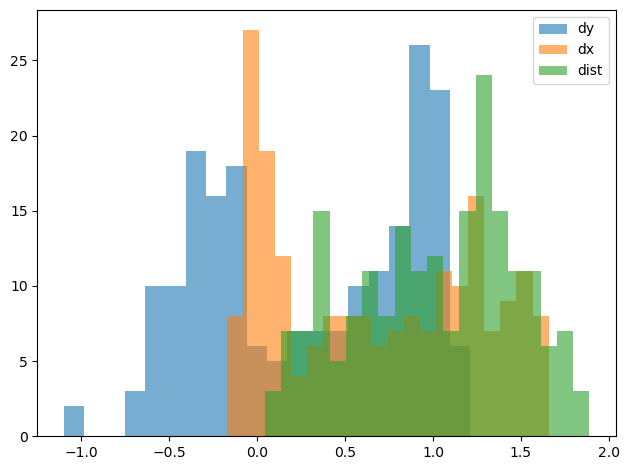

In [15]:
fig, ax = plt.subplots(1, 1, sharey=True, tight_layout=True)
ax.hist(dx,bins=20,label='dy',alpha=0.6)
ax.hist(dy,bins=20, label='dx',alpha=0.6)
ax.hist(footie_diff,label='dist',bins=20,alpha=0.6)
plt.legend()

In [16]:
# radec footprint -> tess_stars2px_debug.py -> Pixel Footprint
# vs
# radec footprint -> tesspoint vectorize -> Pixel Footprint

In [17]:
dx_nvo=fp_comp[:,0] - pixfootie_old.pixel_c.to_numpy()
dy_nvo=fp_comp[:,1] - pixfootie_old.pixel_r.to_numpy()
dist_nvo = (dx_nvo ** 2 + dy_nvo **2) ** 0.5
print(min(dist_nvo),max(dist_nvo))

6.868132111081509e-08 6.385560543761951e-07


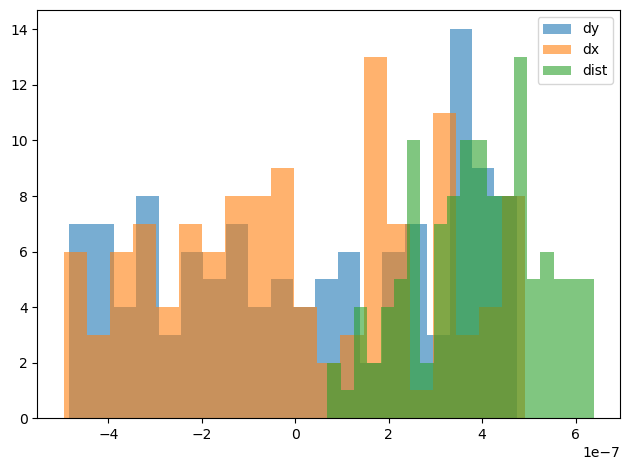

In [18]:
fig, ax = plt.subplots(1, 1, sharey=True, tight_layout=True)
ax.hist(dx_nvo,bins=20,label='dy',alpha=0.6)
ax.hist(dy_nvo,bins=20, label='dx',alpha=0.6)
ax.hist(dist_nvo,label='dist',bins=20,alpha=0.6)
plt.legend()

# Now choose the greatest discrepency since our test value was so low

In [19]:
index_max=np.argmax(dist_nvo)
index_max
pixfootie_old.loc[index_max]

tic           6.000000
ra          313.593801
dec         -46.546113
elo         302.449029
ela         -27.897244
sector        1.000000
camera        1.000000
detector      1.000000
pixel_c      44.920950
pixel_r     251.854230
edge          1.000000
Name: 18, dtype: float64

In [20]:
%run -p -i tess_stars2px_debug.py -t 0 -s 1 -c 313.593801 -46.546113 

# TIC     |   RA      |   Dec     | EclipticLong | EclipticLat | Sector | Camera | Ccd | ColPix | RowPix | EdgeWarn
DEBUG: optics_fp: cphi: -0.7506736080853075
DEBUG: optics_fp: sphi: -0.660673243081772
DEBUG: optics_fp: rfp0*rfp: 42.0500219975458
DEBUG: optics_fp: xytmp: [31.56584173 27.7813244 ]
DEBUG: optics_fp: xytmp shape: (2,)
radec2pix: curVec: [ 0.47424613 -0.4981154  -0.72592814] i: 0
radec2pix: camVec: [-0.20363727 -0.17922262  0.96250253] i: 0 j:0
radec2pix: lng: 221.3512383655061
radec2pix: lat: 74.25998523261158
radec2pix: xyfp: [31.56584173 27.7813244 ]
radec2pix: fitsxpos: [4227.07906705]
radec2pix: fitsypos: [3904.14567211]
radec2pix: ccdxpos: [-0.07906705]
radec2pix: ccdypos: [250.85432789]
000000000 | 313.593801 | -46.546113 | 302.449029 | -27.897244 |  1 | 1 | 1 |   44.920933 |  251.854328 | 1
 

In [21]:
target2=np.array([[313.593801, -46.546113]])
print(tp.radec2pix(target2))

DEBUG:root:DEBUG: radec2pix: curVec: [[ 0.47424613 -0.4981154  -0.72592814]]
DEBUG:root:DEBUG: radec2pix: curVec Shape: (1, 3)
DEBUG:root:DEBUG: radec2pix: camVec: [[-0.20363727]
 [-0.17922262]
 [ 0.96250253]]
DEBUG:root:DEBUG: radec2pix: camVec Shape: (3, 1)
DEBUG:root:DEBUG: cartToSphere: vec: [[-0.20363727 -0.17922262  0.96250253]]
DEBUG:root:DEBUG: radec2pix: lng: [221.35123837]
DEBUG:root:DEBUG: radec2pix: lat: [74.25998523]
DEBUG:root:DEBUG: optics_fp: rtanth: [42.050022]
DEBUG:root:DEBUG: optics_fp: cphi: [-0.75067361]
DEBUG:root:DEBUG: optics_fp: sphi: [-0.66067324]
DEBUG:root:DEBUG: optics_fp: xyfp: [[31.56584173 27.7813244 ]]
DEBUG:root:DEBUG: optics_fp: xyfp shape: (1, 2)
DEBUG:root:DEBUG: make_az_asym: xyp: [[31.56584173 27.7813244 ]]
DEBUG:root:DEBUG: make_az_asym: xyp: shape:  (1, 2)
DEBUG:root:DEBUG: radec2pix: xyfp: [[31.56584173 27.7813244 ]]
DEBUG:root:DEBUG: radec2pix: xyfp Shape: (1, 2)
DEBUG:root:DEBUG: mm_to_pix: fitpx: [[0. 0.]]
DEBUG:root:DEBUG: mm_to_pix: fitpx

(array([[ 44.92093295, 251.85432789]]), array([ True]))


# Wait, I'm dumb, that wasn't the problem
## The problem is - our pixel -> radec -> pixel accuracy is <~ 2 pixels.  This naively seems large.  Is the stars2pix version similar?  we don't know
Theres a reverse mode in stars2pix, so we need to make a footie, go footie - reverse - radecfootie - normal and check its recall

In [22]:
footie=footprint()
file = open("footie_pix_input.txt", "w")
for i in range(0,len(footie)):
    file.write("{0} {1} {2} \n".format(i,footie[i,0], footie[i,1]))
file.close()

In [23]:
%run -p -i tess_stars2px_debug.py -r 1 1 1 1 1 --inputFile footie_pix_input.txt -o footie_radec_pixout.dat

313.789551298924 -47.862968144977444
 

# Alright, fine. I cannot make reverse mode work with an input file, so lets grab the maximal deviation in our comparisonand test that specific case.  

In [24]:
footprint()

array([[   0.        ,    0.        ],
       [   0.        ,   41.79591837],
       [   0.        ,   83.59183673],
       [   0.        ,  125.3877551 ],
       [   0.        ,  167.18367347],
       [   0.        ,  208.97959184],
       [   0.        ,  250.7755102 ],
       [   0.        ,  292.57142857],
       [   0.        ,  334.36734694],
       [   0.        ,  376.16326531],
       [   0.        ,  417.95918367],
       [   0.        ,  459.75510204],
       [   0.        ,  501.55102041],
       [   0.        ,  543.34693878],
       [   0.        ,  585.14285714],
       [   0.        ,  626.93877551],
       [   0.        ,  668.73469388],
       [   0.        ,  710.53061224],
       [   0.        ,  752.32653061],
       [   0.        ,  794.12244898],
       [   0.        ,  835.91836735],
       [   0.        ,  877.71428571],
       [   0.        ,  919.51020408],
       [   0.        ,  961.30612245],
       [   0.        , 1003.10204082],
       [   0.        , 10

In [25]:
index_max=np.argmax(footie_diff)
print(index_max, footie_diff[index_max],dx[index_max], dy[index_max], footie[index_max,:])
target3=footprint_pix[0][index_max,:]

152 1.8881553619509694 0.950485398872388 1.6314742343643047 [2048.           83.59183673]


In [28]:
#But, tesspoint assumes indexed from 44,1 not 0,0 so 
print(2048 + 44, 83.59183673 + 1)

2092 84.59183673


In [29]:
%run -p -i tess_stars2px_debug.py -r 1 1 1 2092 84.59183673

329.56145569137414 -44.09452892451292
 

In [37]:
%run -p -i tess_stars2px_debug.py -t 0 -s 1 -c 329.56145569137414 -44.09452892451292

# TIC     |   RA      |   Dec     | EclipticLong | EclipticLat | Sector | Camera | Ccd | ColPix | RowPix | EdgeWarn
optics_fp: cphi: -0.028387287886555413
optics_fp: sphi: -0.9995969997386176
optics_fp: rfp0*rfp: 30.312749732745203
optics_fp: xytmp: [ 0.86049675 30.30053369]
optics_fp: xytmp shape: (2,)
radec2pix: curVec: [ 0.61920643 -0.36384642 -0.69584422] i: 0
radec2pix: camVec: [-0.00571376 -0.20119777  0.97953398] i: 0 j:0
radec2pix: lng: 268.3733096875324
radec2pix: lat: 78.38824516040944
radec2pix: xyfp: [ 0.86049675 30.30053369]
radec2pix: fitsxpos: [2180.]
radec2pix: fitsypos: [4071.40816319]
radec2pix: ccdxpos: [2047.]
radec2pix: ccdypos: [83.59183681]
optics_fp: cphi: -0.0344382878427335
optics_fp: sphi: 0.9994068262376744
optics_fp: rfp0*rfp: 32.506932340715856
optics_fp: xytmp: [  1.11948309 -32.48765008]
optics_fp: xytmp shape: (2,)
radec2pix: curVec: [ 0.61920643 -0.36384642 -0.69584422] i: 0
radec2pix: camVec: [-0.00739694  0.21466073  0.97666067] i: 0 j:1
radec2pix: l

In [31]:
print(2092 - 2092 , 84.591837 - 84.59183673)

0 2.700000010236181e-07


# OK, so this is maybe convinving-ish that the issue lies in the tesspoint vectorized pixel->radec